# Day 1: Linear Regression and Data Preprocessing

First, let's load the data and plot it to see what's going on. We'll work with housing data collected in Boston in the 1990s (https://archive.ics.uci.edu/ml/machine-learning-databases/housing/), with the goal of trying to predict median house value as a function of the LSTAT value, which is essentially the proportion of people without a high school education living within a certain area. 

In [211]:
import numpy as np #numpy is love numpy is life-easy way to use matrices in python
from sklearn import preprocessing 
from matplotlib import pyplot as plt

When creating models, we always want to randomly split our data into multiple (at least two) sets -- the data used to 'train' our model, and data used to test our model. This lets us to measure how well our chosen model captures the underlying trends in the data we are trying to predict, as well as allowing us to see if we are overfitting. 

Later in the course, we'll be splitting our data into three sets -- training, validation, and test sets. The training and test sets will work the same, but we add the validation set in the middle to tune any hyperparameters (in neural networks) or determine some early stopping criteria (which will function as another safeguard against overfitting). 

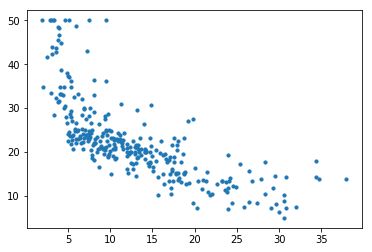

In [212]:
data=np.loadtxt('housing.txt')
x = data[:,np.newaxis,0]
y = data[:,1]

plt.scatter(x,y, s = 10)

In [213]:
def split_data(x,y):
    x = np.array(x)
    y = np.array(y)
    n = len(x)
    ind = np.arange(n)
    np.random.shuffle(ind)
    
    test_n = int(np.ceil(n/5))
    test_ind = ind[0:test_n]
    train_ind = ind[(test_n+1):]
    
    x_train = x[train_ind]
    x_test = x[test_ind]
    y_train = y[train_ind]
    y_test = y[test_ind]
    
    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = split_data(x,y)

In preprocessing, we may wish to standardize our data by demeaning it and dividing any nonconstant features by our standard deviation -- this gives us data with mean 0 and unit variance. We standardize the training and the test sets separately. 

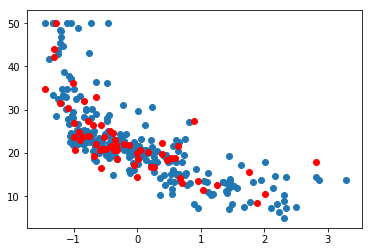

In [214]:
def standardize(x, mean_set=x, std_set=x):
    m = np.mean(mean_set, axis = 0)
    s = np.std(std_set, axis = 0)
    # print("m={}, s={}".format(m, s))
    x_st = (x-m)/s
    return(x_st)

x_st_train = standardize(x_train, x_train, x_train)
x_st_test = standardize(x_test,mean_set=x_train,std_set=x_train)
plt.scatter(x_st_train,y_train)
plt.scatter(x_st_test, y_test, c = "r")

Do you see any outliers? Complete the code below to identify any potentially problematic data points. What is the effect that their removal would have on a line of best fit? Is their removal necessary in this case?

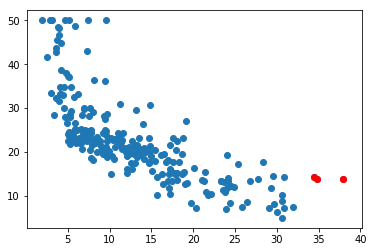

In [215]:
def outliers(x):
    quartile_1, quartile_3 = np.percentile(x, [25,75])
    iqr = quartile_3 - quartile_1
    lower = quartile_1 - 1.5 * iqr
    upper = quartile_3 + 1.5 * iqr
    ind = np.where((x < lower) | (x > upper))
    return(ind)

out = outliers(x_train)[0]
x_outliers = [x_train[i] for i in out]
y_outliers = [y_train[i] for i in out]
plt.figure
plt.scatter(x_train,y_train)
plt.scatter(x_outliers, y_outliers,color ='r')

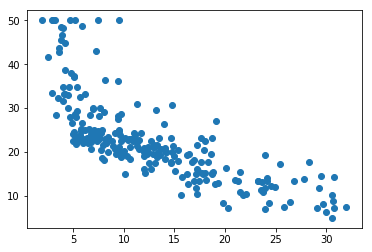

In [216]:
x_rem = [x_train[i] for i in range(len(x_train)) if i not in out]
y_rem = [y_train[i] for i in range(len(y_train)) if i not in out]
plt.scatter(x_rem, y_rem)

When dealing with linear models, we are assuming that the data are of the form $Y = X \beta + \epsilon$. Our goal is to minimize the error between the actual data and our estimation. 
$$
    \min_{\hat{\beta}} \|Y - X \hat{\beta}\|_2
$$
Minimizing this quantity is equivalent to solving the normal equations for $\hat{\beta}$:
$$
    X^TY = X^TX \hat{\beta}
$$
Note that, in order to solve the normal equations, $X^TX$ must be invertible. This means that the columns of $X$ must be linearly independent. For example, if we're modeling shoe size and we have the explanatory variables __height_in_inches__ and __height_in_centimeters__, we would run into problems, because __height_in_inches__ = $\frac{1}{2.54}$ __height_in_centimeters__. In these cases, we simply remove one of the explanatory variables that's causing trouble.

Fill in the code to compute this quantity and return the predicted values $X \hat{\beta}$. Plot your results.

In [217]:
def lin_reg(x, y):
    x = np.array(x)
    y = np.array(y)
    ones = np.ones(len(x))
    X = np.column_stack((ones, x))
    
    #####
    beta_hat = np.matmul(np.matmul(np.transpose(X), y), np.linalg.pinv(np.matmul(np.transpose(X), X)))
    #####
    
    return beta_hat

def lin_reg_preds(x_train, y_train, x_test):
    beta_hat = lin_reg(x_train, y_train)
    # predictions = []
    X_test = np.array(x_test)
    
    #####
    X_test = np.column_stack((np.ones(len(x_test)), X_test))
    predictions = np.matmul(X_test, beta_hat).tolist()
    #####
    
    return predictions

fit the training data without outlier removal and standardization:

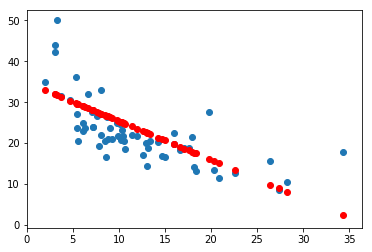

In [218]:
y_predicted = lin_reg_preds(x_train, y_train, x_test)
plt.scatter(x_test, y_test)
plt.scatter(x_test, y_predicted, c ='r')

fit the training data with outlier removal and without standardization:

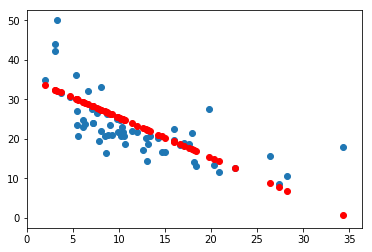

In [219]:
y_predicted_outlier_removed = lin_reg_preds(x_rem, y_rem, x_test)
plt.scatter(x_test, y_test)
plt.scatter(x_test, y_predicted_outlier_removed, c ='r')

Fill in the __MSE__ code to compute the Mean Squared Error. How does your MSE change when you include outliers? Remove outliers? Standardize? What if you take higher powers of your data? That is, what happens if, instead of $y = \beta_0 + \beta_1 x$, you consider a model like $y = \beta_0 + \beta_1 x + \beta_2 x^2$? Fill in the __degexpand__ code below. Plot your results. 

In [220]:
def MSE(y_preds, y_test):
    output = np.sum(np.square(np.array(y_preds) - np.array(y_test)))
    return output

In [221]:
mse = MSE(y_predicted, y_test)
mse_removed = MSE(y_predicted_outlier_removed, y_test)
print("MSE without outlier removal = {}, MSE with outlier removal = {}".format(mse, mse_removed))

MSE without outlier removal = 1964.3776651273918, MSE with outlier removal = 2025.102545110895


In [222]:
mse_standardized = MSE(lin_reg_preds(x_st_train, y_train, x_st_test), y_test)
print("MSE with standardization = {}".format(mse_standardized))

MSE with standardization = 1964.377665127405


In [223]:
y_predicted_st = lin_reg_preds(x_st_train, y_train, x_st_test)

In [224]:
def degexpand(X, deg, C=None):
    """
    Prepares data matrix with a column of ones and polynomials of specified
    degree.

    Parameters
    ----------
    X : 2D array
        n x d data matrix (row per example)
    deg : integer
        Degree of polynomial
    C : 1D array
        Scaling weights. If not specifed, weights are calculated to fit each
        columns of X in [-1, 1].
        Note: It is shown in problem set 1 that this normalization does
        not affect linear regression, as long as it is applied
        consistently to training *and* test data.

    Returns
    -------
    out_X : 2D array
        n x (2 * d + 1) data matrix (row per example)
        The output is arranged as follows:
            - X[:, 0] is all ones
            - X[:, 1] is x_1
            - X[:, 2] is x_1^2
            - ...
            - X[:, deg] is x_1^deg
            - X[:, deg+1] is x_2
            - X[:, deg+2] is x_2^2
            - etc.
    C : 1D array
        Scaling weights that were used. Can be used in scaling other data later in the same way.
    """
    N, M = X.shape
    
    out_X = np.zeros((N, M * deg))
    for m in range(M):
        for d in range(deg):
            out_X[:, m * deg + d] = X[:, m] ** (d + 1)
    out_X = np.concatenate([np.ones((out_X.shape[0], 1)), out_X], axis=1)

    if C is None: C = abs(out_X).max(axis=0)
    else: assert np.shape(C) == (out_X.shape[1],), "C must match outgoing matrix"
        
    out_X /= C
    return out_X, C

In [225]:
deg = 2

X_train, X_test, Y_train, Y_test = split_data(x,y)

X_train_bias, C = degexpand(X_train, deg)
    
X_test_bias, C = degexpand(X_test, deg, C)

In [226]:
y_predicted_deg = lin_reg_preds(X_train_bias, Y_train, X_test_bias)

Extend this to a multidimensional dataset. The following data are from a 2009 paper on wine quality (https://archive.ics.uci.edu/ml/datasets/Wine+Quality). The output (quality from 0-10) is modeled as a result of several explanatory variables: 
1. fixed acidity 
2. volatile acidity 
3. citric acid 
4. residual sugar 
5. chlorides 
6. free sulfur dioxide 
7. total sulfur dioxide 
8. density 
9. pH 
10. sulphates 
11. alcohol 

## Exploratory data analysis

In [227]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [228]:
wine = pd.read_csv("winequality-white.csv", delimiter=";")
wine[:10]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [229]:
wine.shape

(4898, 12)

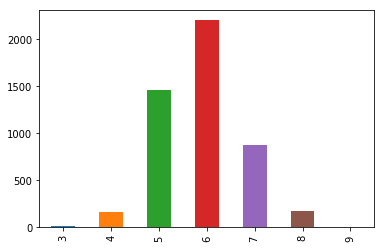

In [230]:
wine['quality'].value_counts().sort_index().plot.bar()

Note that the proportions in too low (<=4) or too high (>= 8) categories are small. Hence wines are classified into 3 categories by combining 3, 4, 5 into one category(low), 6(medium) and 7(high):

In [231]:
wine['quality'] = wine['quality'].replace(to_replace=[3, 4, 5, 6, 7, 8, 9], value=[0,0,0,1,2,2,2])

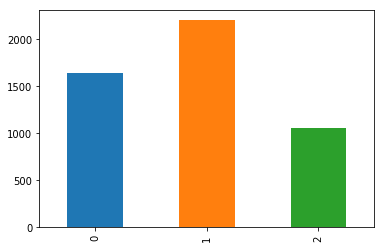

In [232]:
wine['quality'].value_counts().sort_index().plot.bar()

We plot the heatmap of the correlation among variables.

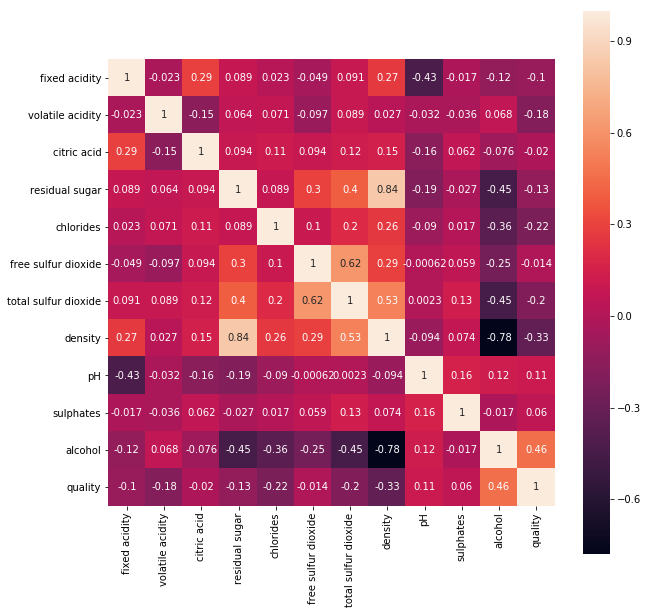

In [233]:
cor = wine.corr()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cor, square=True, annot=True, ax=ax)

Weak relationships between quality and alcohol and density. Density has a correlation of 0.84 with residual sugar and a correlation of -0.78 with alcohol, which may be a great concernt if we want to use a linear model. My feeling is that a linear model might not be suitable for this dataset due to the lack of strong correlation between input variables and the response variable. The following pairplot also barely give us any hint for using linear models.

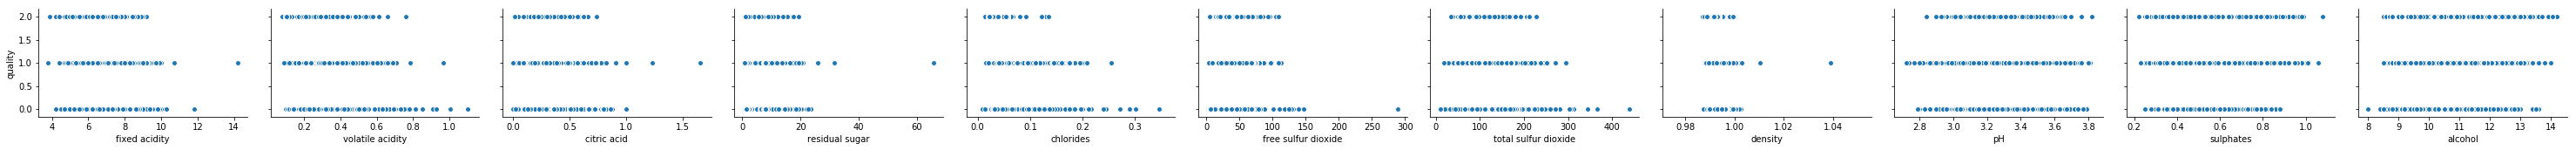

In [234]:
sns.pairplot(data=wine, y_vars=['quality'], x_vars=wine.columns[:-1], aspect=1.5)

In [235]:
wine.std()

fixed acidity            0.843868
volatile acidity         0.100795
citric acid              0.121020
residual sugar           5.072058
chlorides                0.021848
free sulfur dioxide     17.007137
total sulfur dioxide    42.498065
density                  0.002991
pH                       0.151001
sulphates                0.114126
alcohol                  1.230621
quality                  0.733030
dtype: float64

## 3. Data preprocessing

In [236]:
# split data into training set and testing setmask = np.random.rand(len(wine)) < 0.8
mask = np.random.rand(len(wine)) < 0.8
train_wine = wine[mask]
test_wine = wine[~mask]

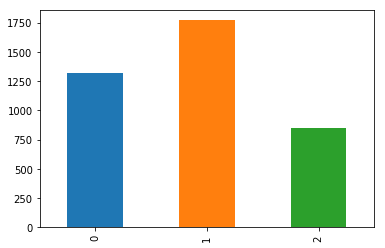

In [237]:
train_wine['quality'].value_counts().sort_index().plot.bar()

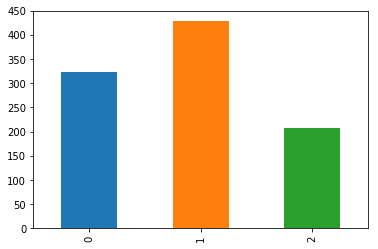

In [238]:
test_wine['quality'].value_counts().sort_index().plot.bar()

In [239]:
# visualiza how variables distribute
def plot_data(df):
    fig, ax = plt.subplots(1, figsize=(10, 8))
    for i in range(df.shape[1]-1):
        ax.scatter(x=np.ones((df.shape[0],)) * (i + 1), y=df[df.columns[i]].values, label=df.columns[i])
    ax.legend()
    ax.set_xlabel("value")
    ax.set_ylabel("indicator")

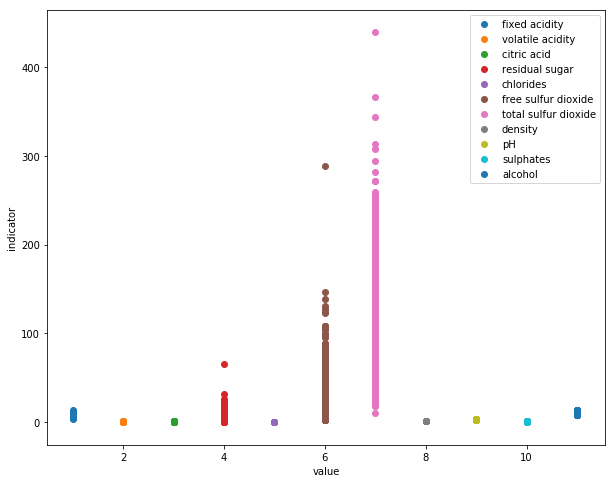

In [240]:
plot_data(train_wine)

In [241]:
# normalize training and testing data
std_train_wine = (train_wine - train_wine.mean()) / train_wine.std()
std_train_wine['quality'] = train_wine['quality'] # keep the labels untouched
std_test_wine = (test_wine - train_wine.mean()) / train_wine.std()
std_test_wine['quality'] = test_wine['quality'] # keep the labels untouched

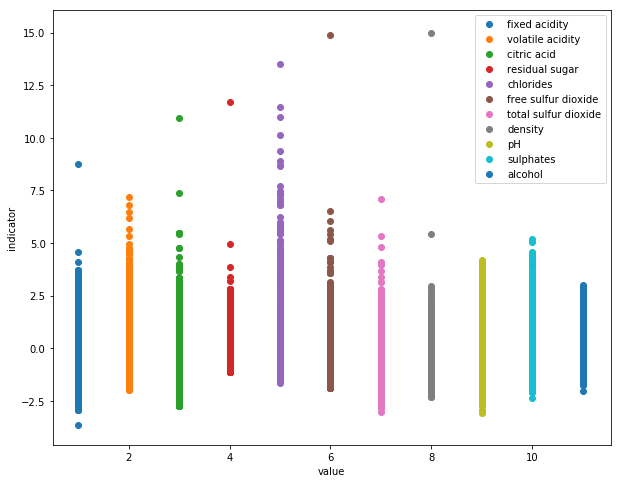

In [242]:
plot_data(std_train_wine)

In [243]:
wine_train_x = std_train_wine[std_train_wine.columns[:-1]].values
wine_train_y = std_train_wine['quality'].values.ravel()
wine_test_x = std_test_wine[std_test_wine.columns[:-1]].values
wine_test_y = std_test_wine['quality'].values.ravel()

In [244]:
# outlier removal
out_wine_train = outliers(wine_train_x)[0]
wine_train_x = [wine_train_x[i] for i in range(len(out_wine_train)) if i not in out_wine_train]
wine_train_y = [wine_train_y[i] for i in range(len(out_wine_train)) if i not in out_wine_train]

## 4. Training models
### 4.1 KNN

In [245]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix

In [246]:
def knn_train(x, y, ks):
    accuracies = []
    for k in ks:
        scores = cross_validate(KNeighborsClassifier(n_neighbors=k), X=x, y=y, cv=3)
        accuracies.append(np.mean(scores['test_score']))
    return accuracies

In [247]:
ks = np.array(range(1, 25))
accuracies = knn_train(wine_train_x, wine_train_y, ks)

In [248]:
print("highest accuracy achieved on training set is = {:.4f},"\
      " when k = {}".format(max(accuracies), ks[np.argmax(accuracies)]))

highest accuracy achieved on training set is = 0.5392, when k = 10


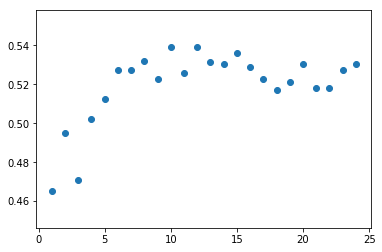

In [249]:
# plot k v.s. accuracy
plt.scatter(x=ks, y=accuracies)

In [250]:
def compute_accuracy(y_true, y_pred):
    diff = y_true - y_pred
    correct = np.nonzero(diff == 0)[0]
    return correct.size / y_true.shape[0]

In [253]:
knn_classifier = KNeighborsClassifier(n_neighbors=ks[np.argmax(accuracies)])
knn_classifier.fit(wine_train_x, wine_train_y)
knn_y_pred = knn_classifier.predict(wine_test_x)
knn_confusion = confusion_matrix(y_true=wine_test_y, y_pred=knn_y_pred)
print("accuracy on testing set = {:.4f}".format(compute_accuracy(wine_test_y, knn_y_pred)))
print("confusion matrix: ")
print(knn_confusion)

accuracy on testing set = 0.5230
confusion matrix: 
[[164 129  30]
 [ 88 233 107]
 [ 11  92 104]]


From the confusion matrix we can find that wines of these qualities are easily misclassified:

quality low (0) -> medium (1)

quality medium (1) -> quality low (0) and high(2)

quality high(2) -> medium (1)

Conclusion:

It does not look like wine quality is well supported by its chemical properties.